In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_csv('train_data.csv')

In [28]:
df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


In [29]:
df['essay_combined'] = df['project_essay_1'].fillna('') + ' ' + df['project_essay_2'].fillna('')
df['essay_length'] = df['essay_combined'].apply(lambda x: len(x.split()))

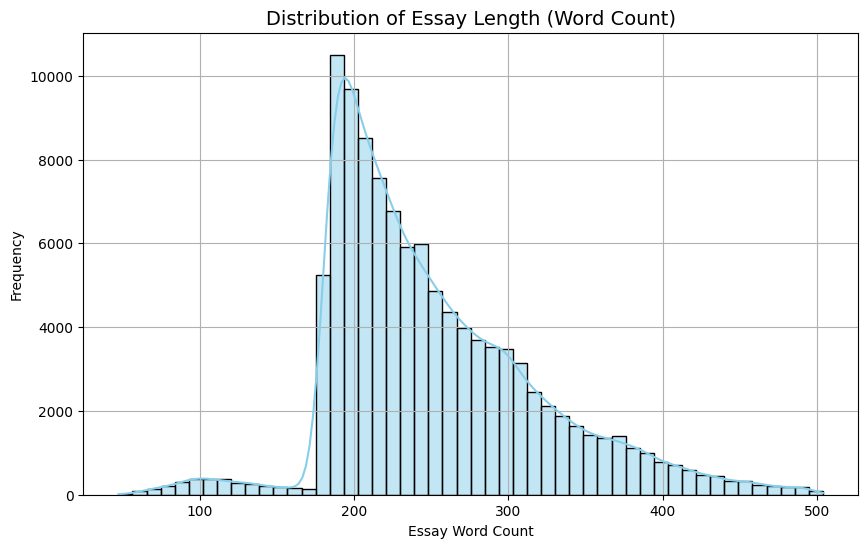

In [30]:
# 1. Histogram of Essay Lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['essay_length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Essay Length (Word Count)', fontsize=14)
plt.xlabel('Essay Word Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

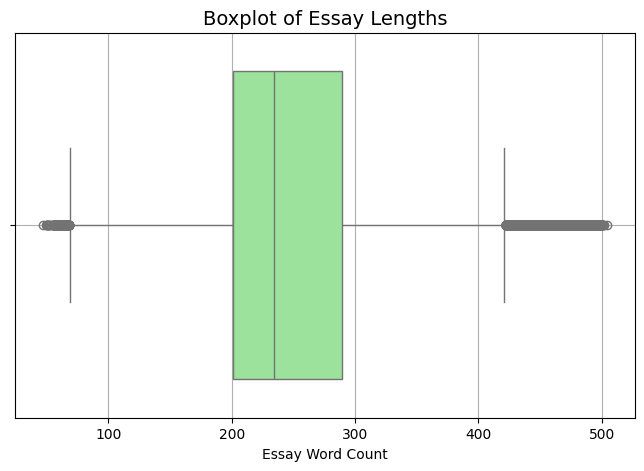

In [31]:
# 2. Boxplot to Detect Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['essay_length'], color='lightgreen')
plt.title('Boxplot of Essay Lengths', fontsize=14)
plt.xlabel('Essay Word Count')
plt.grid(True)
plt.show()

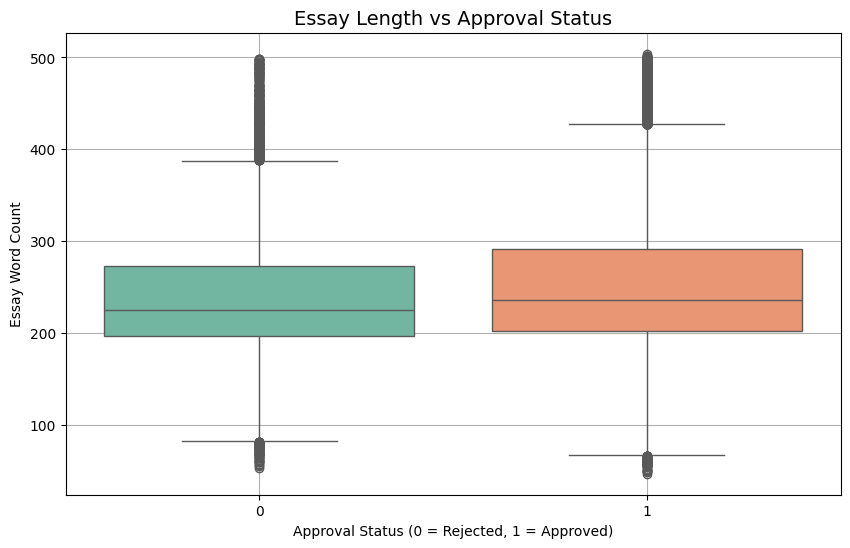

In [32]:
# 3. Correlation with Approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='project_is_approved', y='essay_length', data=df, palette='Set2')
plt.title('Essay Length vs Approval Status', fontsize=14)
plt.xlabel('Approval Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Essay Word Count')
plt.grid(True)
plt.show()

In [33]:
mean_lengths = df.groupby('project_is_approved')['essay_length'].mean()
print("\nMean Essay Length by Approval Status:")
print(mean_lengths)


Mean Essay Length by Approval Status:
project_is_approved
0    240.921473
1    252.767955
Name: essay_length, dtype: float64


### Hypothesis Testing
- Null Hypothesis (H₀): There is no difference in the mean essay lengths of approved vs. rejected projects.
    - μapproved = μrejected
- Alternative Hypothesis (H₁): Approved projects have longer essays on average.
    - μapproved  >μ rejected (One-tailed test)

 

In [34]:
df['essay_length'] = df['essay_combined'].str.split().apply(len)

# Spliting data by approval status
approved_essays = df[df['project_is_approved'] == 1]['essay_length']
rejected_essays = df[df['project_is_approved'] == 0]['essay_length']

In [35]:
from scipy.stats import ttest_ind

# Performing one-tailed t-test
t_stat, p_value = ttest_ind(approved_essays, rejected_essays, equal_var=False)

# Converting to one-tailed p-value
p_value_one_tailed = p_value / 2

print(f"T-statistic: {t_stat}")
print(f"One-tailed p-value: {p_value_one_tailed}")

T-statistic: 22.097636238670876
One-tailed p-value: 1.8971343130568858e-107


In [36]:
alpha = 0.05
if (t_stat > 0) and (p_value_one_tailed < alpha):
    print("Reject H₀: Approved projects have significantly longer essays.")
else:
    print("Fail to reject H₀: No significant difference in essay lengths.")


Reject H₀: Approved projects have significantly longer essays.


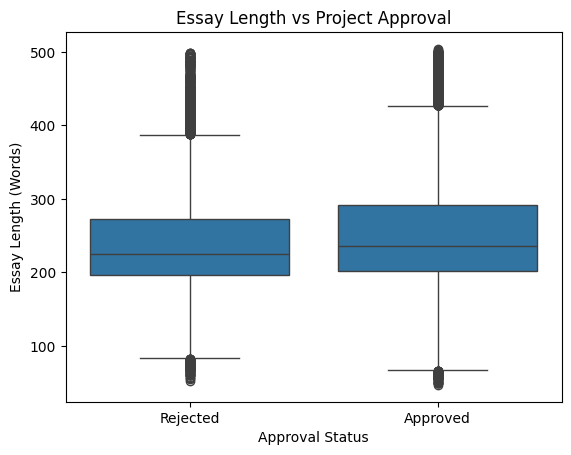

In [37]:
sns.boxplot(x='project_is_approved', y='essay_length', data=df)
plt.xticks([0,1], ['Rejected', 'Approved'])
plt.title('Essay Length vs Project Approval')
plt.ylabel('Essay Length (Words)')
plt.xlabel('Approval Status')
plt.show()
